### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [3]:
df = pd.read_csv("D:/Ankit-KCode/Human Stress Detection and Prediction/Human Stress Factors Dataset.csv")
df.head(10)

,Snoring Rate,Respiration Rate,Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,0
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,0


In [3]:
df.shape

(630, 9)

### Data Preprocessing

##### Basic Insights Of Dataset

In [4]:
# Data Type info of Colums
df.dtypes

Snoring Rate        float64
Respiration Rate    float64
Temperature         float64
Limb Movement       float64
Blood Oxygen        float64
Eye Movement        float64
Sleep Hours         float64
Heart Rate          float64
Stress Levels         int64
dtype: object

In [5]:
# Statistical Summary of Dataset
df.describe()

,Snoring Rate,Respiration Rate,Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,0.600000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,0.490287
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,0.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,1.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,1.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Rate      630 non-null    float64
 1   Respiration Rate  630 non-null    float64
 2   Temperature       630 non-null    float64
 3   Limb Movement     630 non-null    float64
 4   Blood Oxygen      630 non-null    float64
 5   Eye Movement      630 non-null    float64
 6   Sleep Hours       630 non-null    float64
 7   Heart Rate        630 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


<h8>There is no Null Value.</h8>

In [7]:
# Checking Distribution of Target Variable
df['Stress Levels'].value_counts()

Stress Levels
1    378
0    252
Name: count, dtype: int64

### Data Visualization

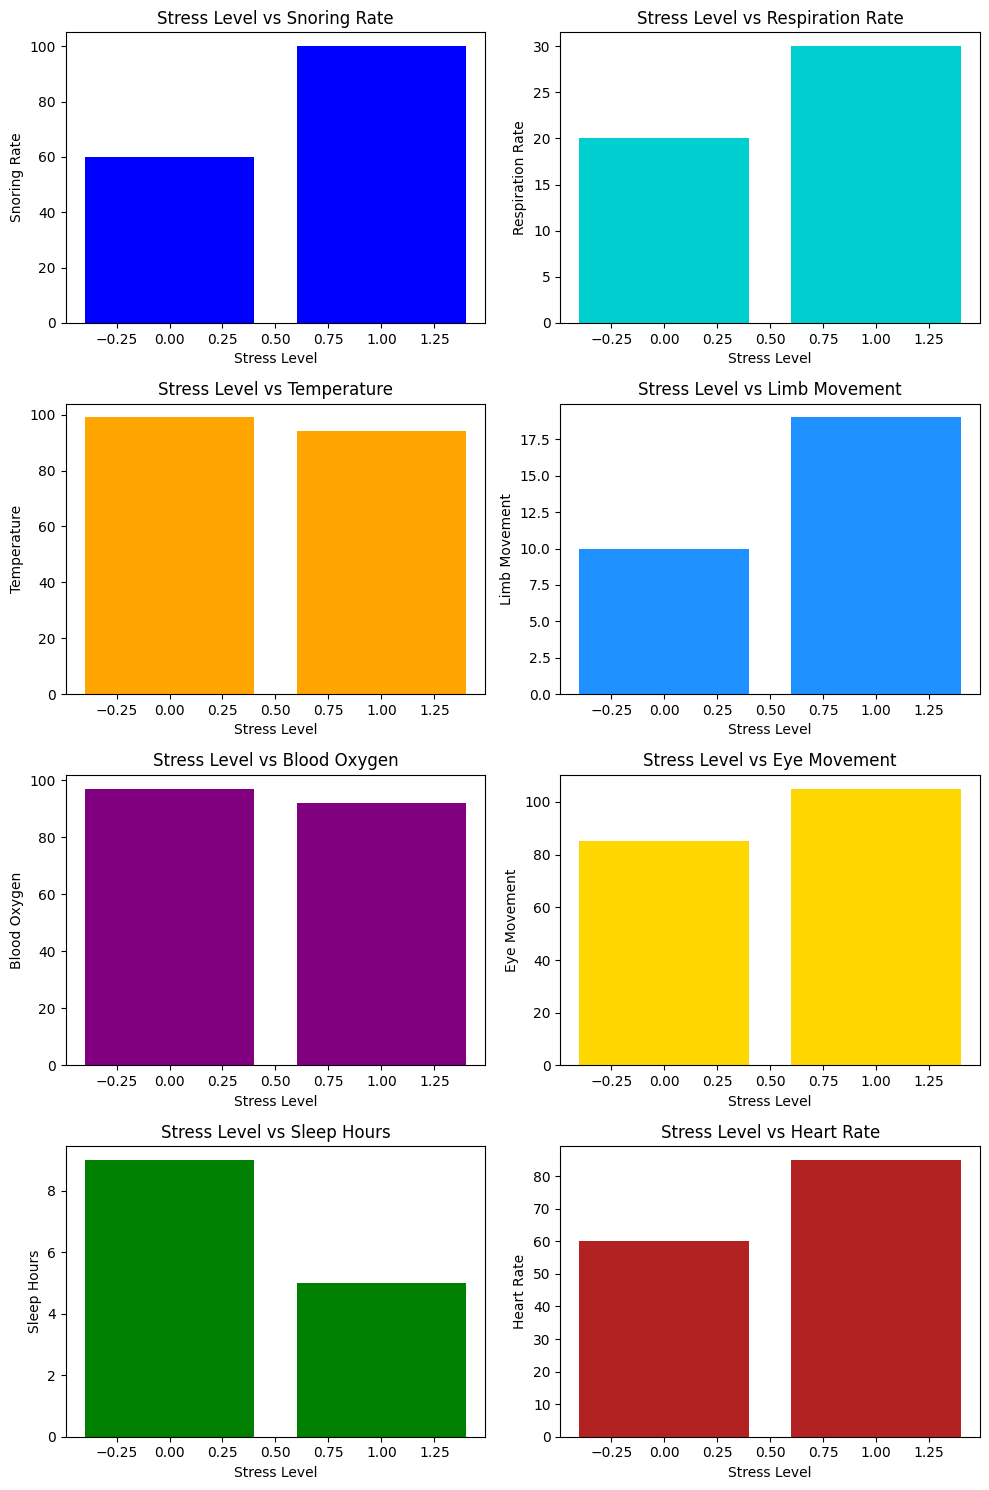

In [14]:
# Define the columns for plotting
columns = ['Snoring Rate', 'Respiration Rate', 'Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']
stress_levels = df['Stress Levels']

# Set up the figure and subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a list of colors for each graph
colors = ['blue', 'darkturquoise', 'orange', 'dodgerBlue', 'purple', 'gold', 'green', 'firebrick']

# Plot each column against stress levels
for i, column in enumerate(columns):
    axes[i].bar(stress_levels, df[column], color= colors[i])
    axes[i].set_title('Stress Level vs ' f'{column}')
    axes[i].set_xlabel('Stress Level')
    axes[i].set_ylabel(column)

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

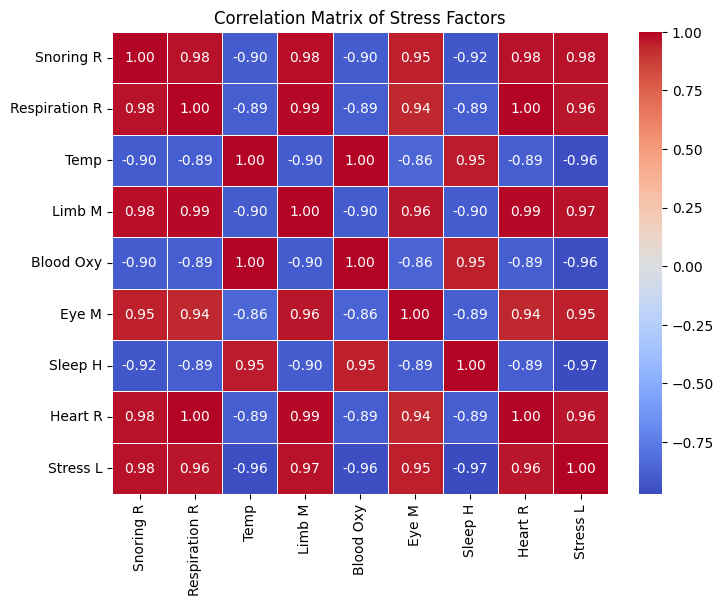

In [69]:
# Plotting Correlation Matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Stress Factors')

# Show the plot
plt.show()

##### PairPlot - Visualizing Relationships

Analysing how features like heart rate, sleep hours, and snoring rate relate to each other and to the stress level.
For example, people with high heart rates tend to have higher stress levels.

A pairplot can show natural clusters between data points. For instance, you may observe that certain combinations of body temperature, respiration rate, and limb movement are strongly associated with specific stress levels.

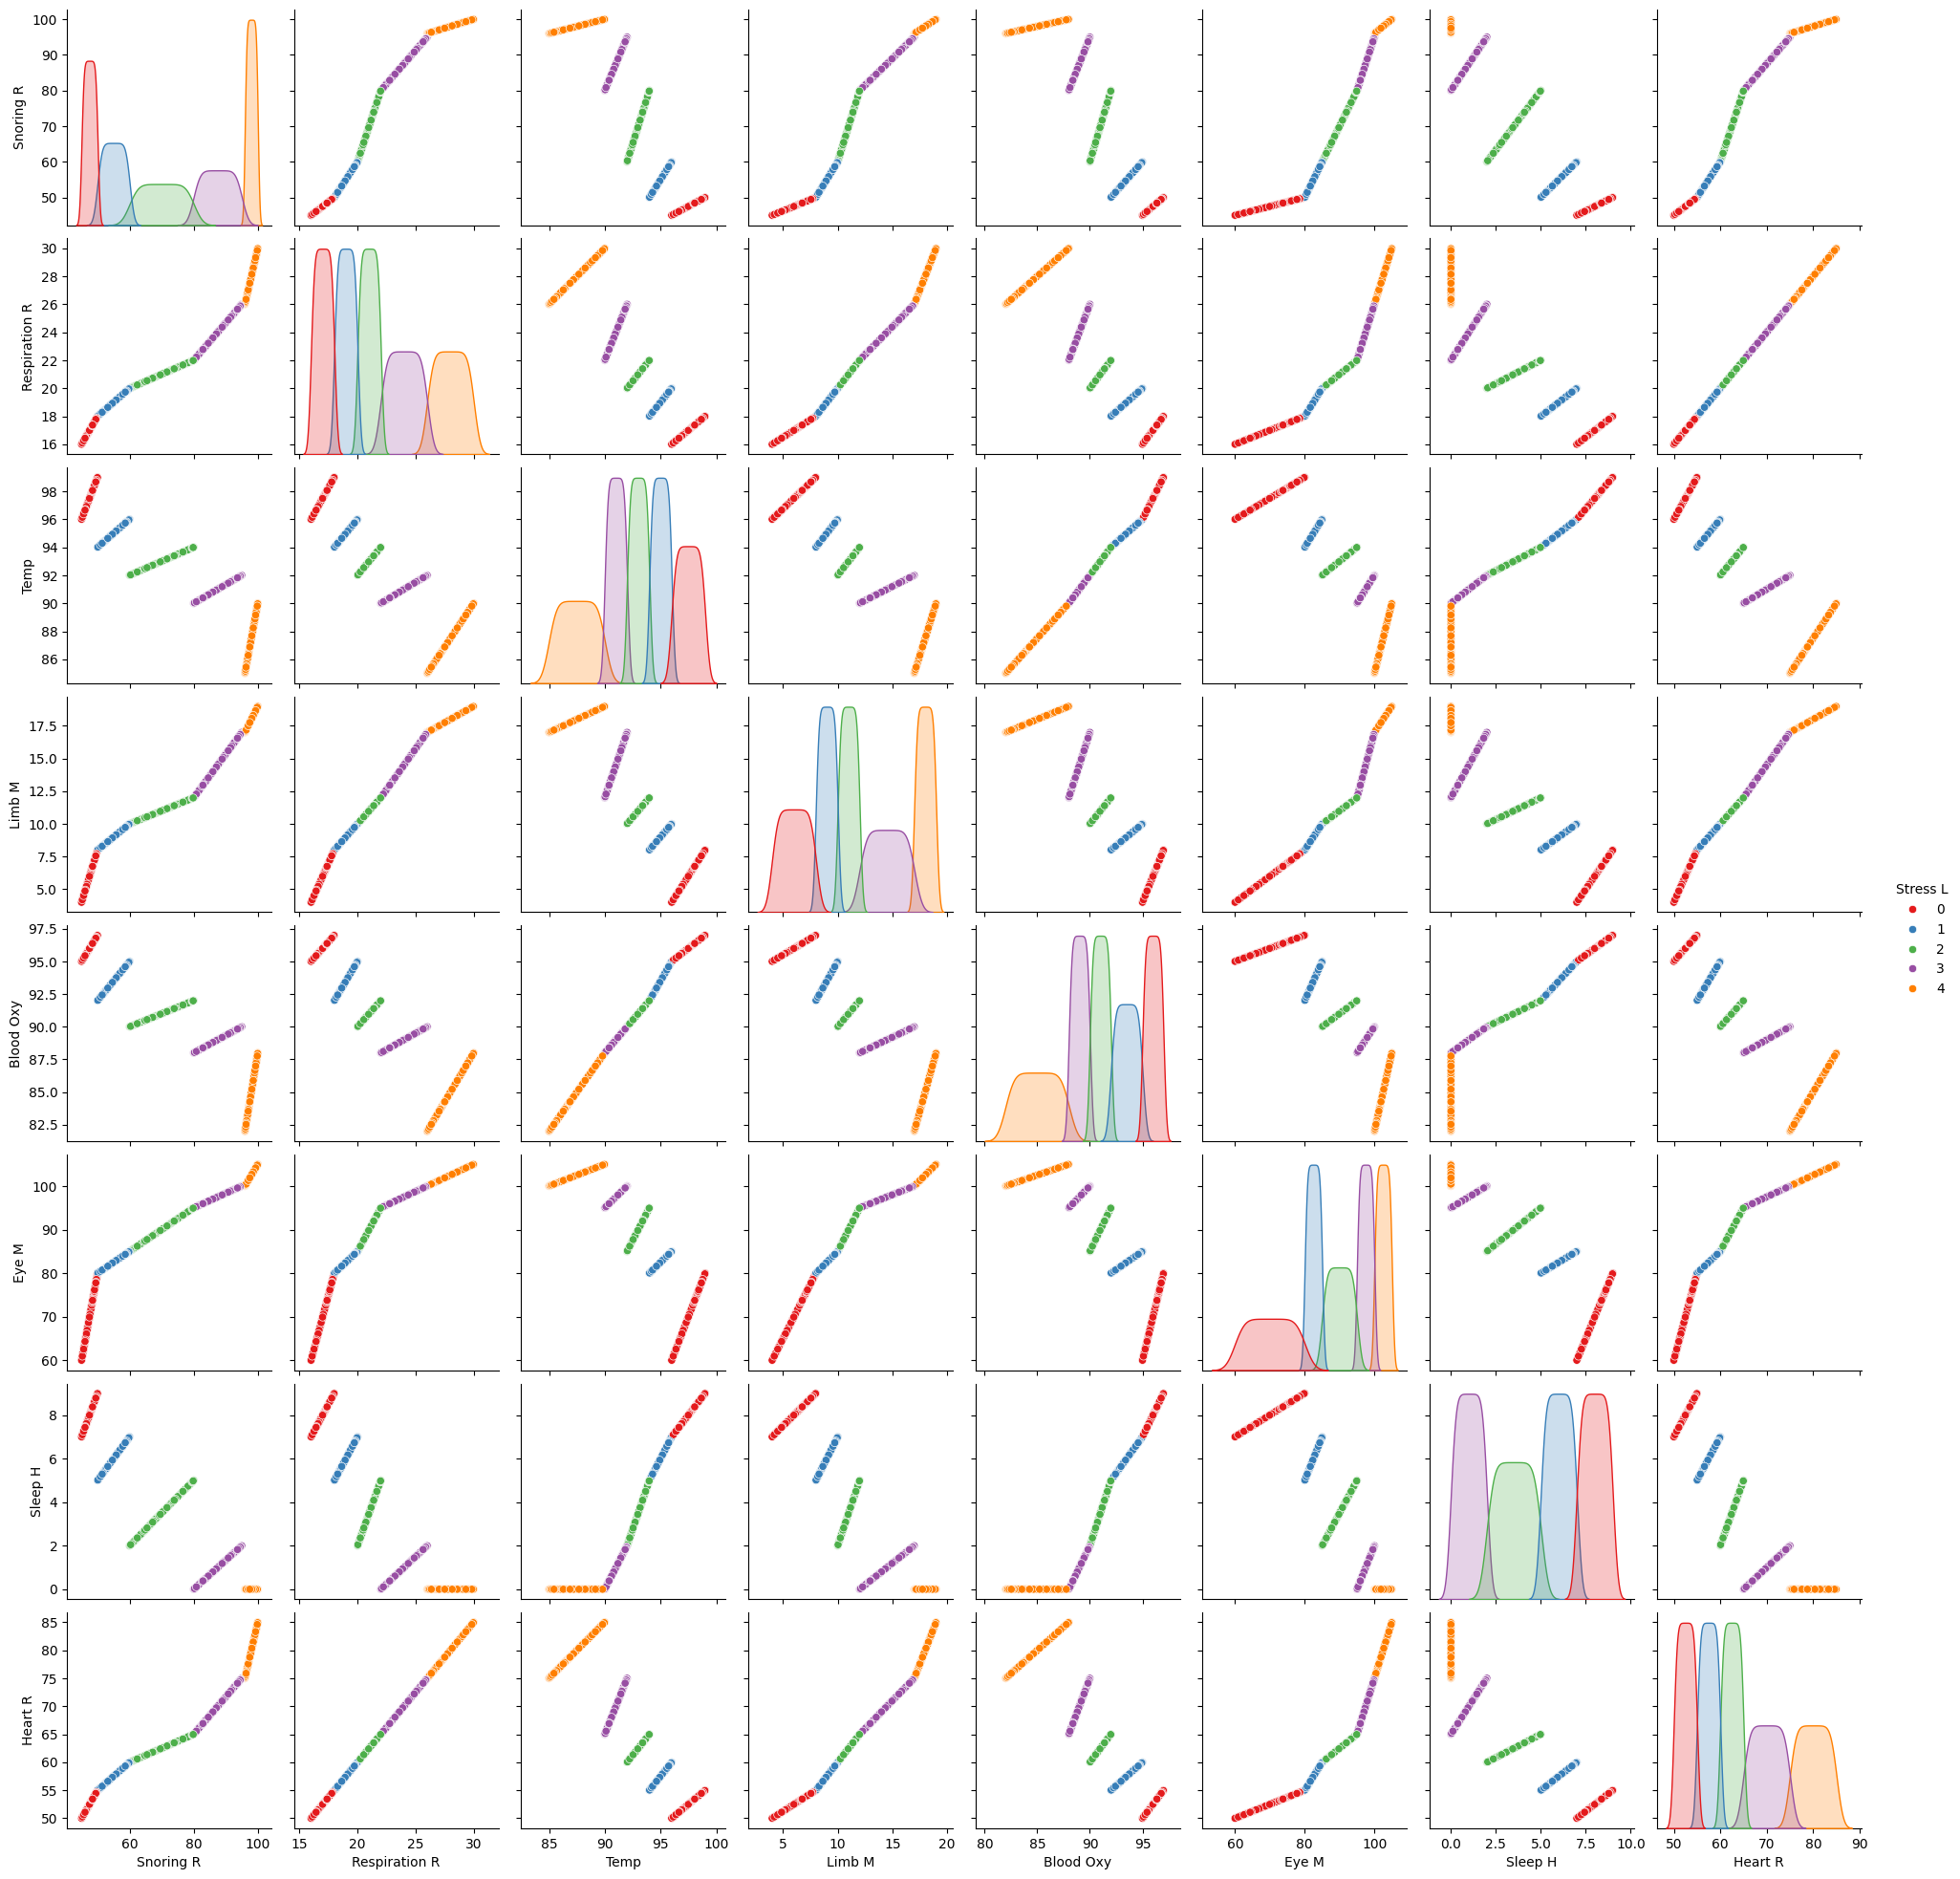

In [70]:
# Create a pairplot
sns.pairplot(df, hue='Stress L', diag_kind='kde', palette='Set1')

# Show the plot
plt.show()

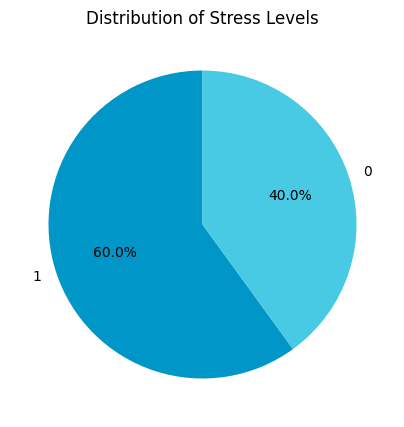

In [11]:
# Calculate the distribution of stress levels
stress_level_distribution = df['Stress Levels'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(stress_level_distribution, labels=stress_level_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#0096C7', '#48CAE4', '#90E0EF', '#00B4D8', '#023E8A'])

# Add a title
plt.title('Distribution of Stress Levels')

# Display the plot
plt.show()

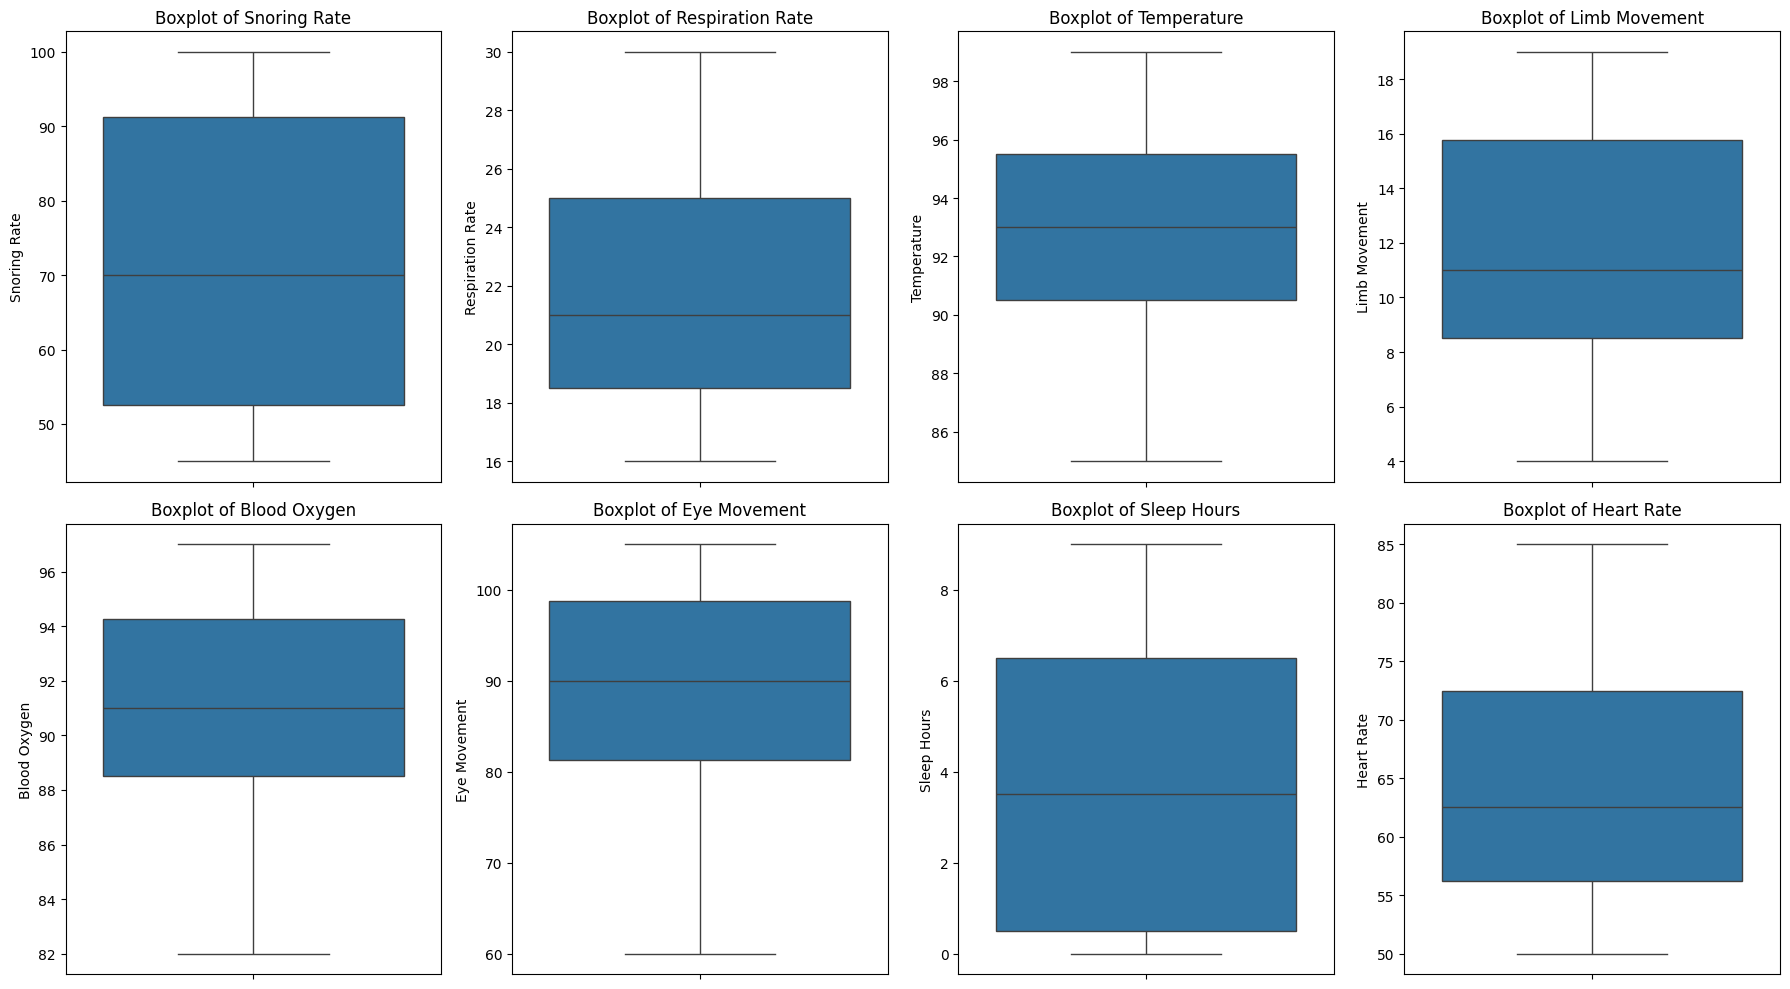

In [12]:
# Define the columns for which you want to plot boxplots
columns = ['Snoring Rate', 'Respiration Rate', 'Temperature', 'Limb Movement', 'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 'Heart Rate']

# Set up a 2x4 grid for boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns

# Loop through each column and plot a boxplot in the respective grid position
for i, column in enumerate(columns):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()